# Statistic training

## Standard deviation

La formula in LaTeX per la deviazione standard è:

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2}$$

Dove:
- sigma rappresenta la deviazione standard.
- N è il numero totale di campioni o osservazioni.
- x_i rappresenta ciascun valore nell'insieme di dati.
- mu è la media dei valori nell'insieme di dati.
- Il simbolo somma indica la somma su tutti i valori da 1 a N.

Notiamo che:

$$Varianza = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2$$

E quiindi:

$$\sigma = \sqrt{Varianza}$$

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset
df = pd.read_csv('../Data/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

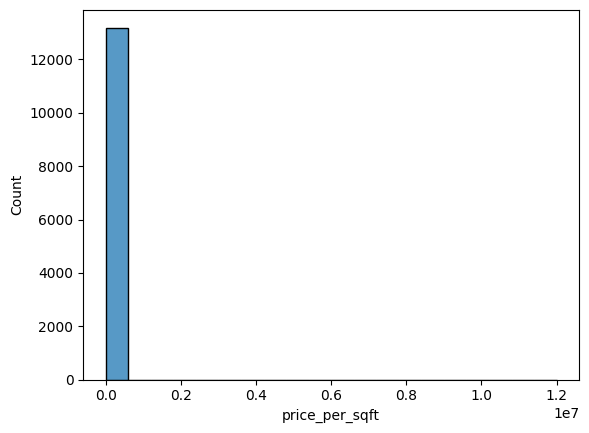

In [3]:
sns.histplot(df.price_per_sqft, bins=20)

Let's remove the outlier from this column by using the standard deviation, the percentile technique (with [0.001, 0.999] range) and z-score of 4.

<Axes: xlabel='price_per_sqft', ylabel='Count'>

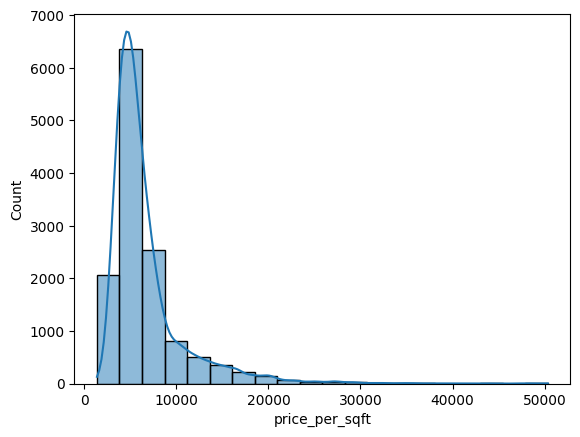

In [4]:
# Quartiles
min = df.price_per_sqft.quantile(0.001)
max = df.price_per_sqft.quantile(0.999)

df2 = df[(df.price_per_sqft > min) & (df.price_per_sqft < max)]
sns.histplot(df2.price_per_sqft, bins=20, kde=True)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

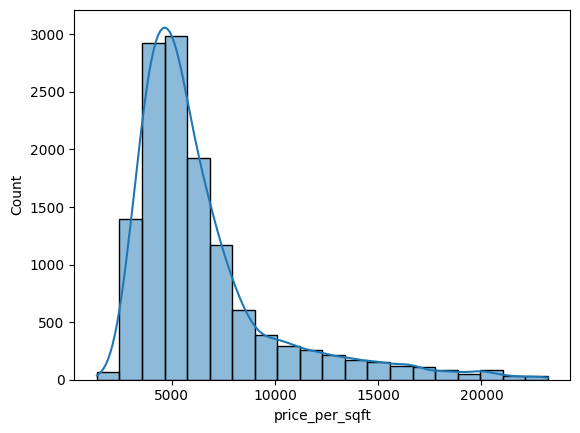

In [5]:
#Standard Deviation

min = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()

df3 = df2[(df2.price_per_sqft >= min) & (df2.price_per_sqft <= max)]
sns.histplot(df3.price_per_sqft, bins=20, kde=True)

In [6]:
df2.shape[0] - df3.shape[0]

125

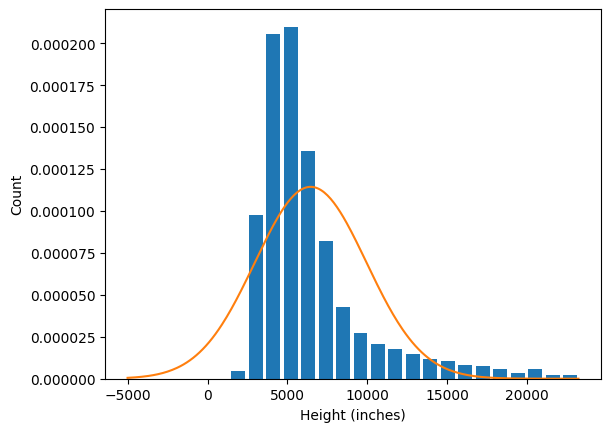

In [7]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [13]:
df2.loc[:, 'zscore'] = df.price_per_sqft.apply(lambda x: (x-df2.price_per_sqft.mean())/df2.price_per_sqft.std())
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [14]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [15]:
df4 = df2[(df2.zscore < 4) & (df2.zscore > -4)]

In [16]:
df2.shape[0] - df4.shape[0]

125